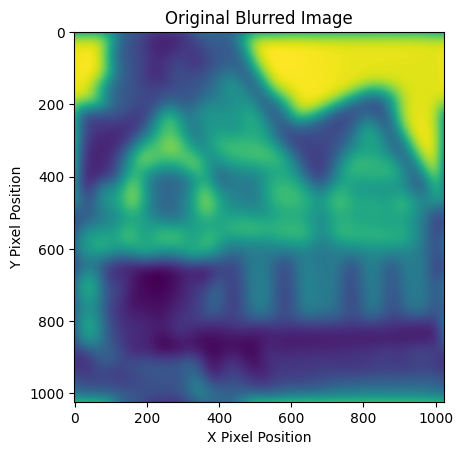

1024 1024


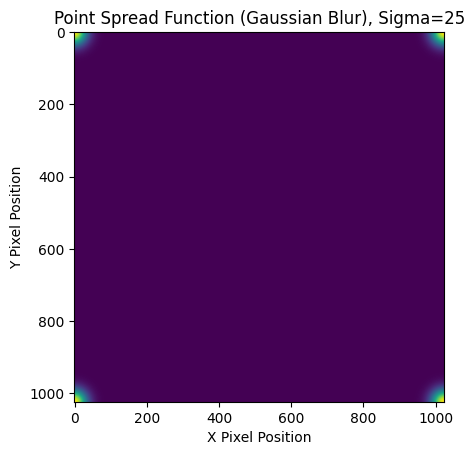

[[3926.99081699+0.j 3881.05860156+0.j 3746.46038168+0.j ...
  3532.42311242+0.j 3746.46038168+0.j 3881.05860156+0.j]
 [3881.05860156+0.j 3835.66363424+0.j 3702.63974818+0.j ...
  3491.10597497+0.j 3702.63974818+0.j 3835.66363424+0.j]
 [3746.46038168+0.j 3702.63974818+0.j 3574.229237  +0.j ...
  3370.03162441+0.j 3574.229237  +0.j 3702.63974818+0.j]
 ...
 [3532.42311242+0.j 3491.10597497+0.j 3370.03162441+0.j ...
  3177.49992977+0.j 3370.03162441+0.j 3491.10597497+0.j]
 [3746.46038168+0.j 3702.63974818+0.j 3574.229237  +0.j ...
  3370.03162441+0.j 3574.229237  +0.j 3702.63974818+0.j]
 [3881.05860156+0.j 3835.66363424+0.j 3702.63974818+0.j ...
  3491.10597497+0.j 3702.63974818+0.j 3835.66363424+0.j]]


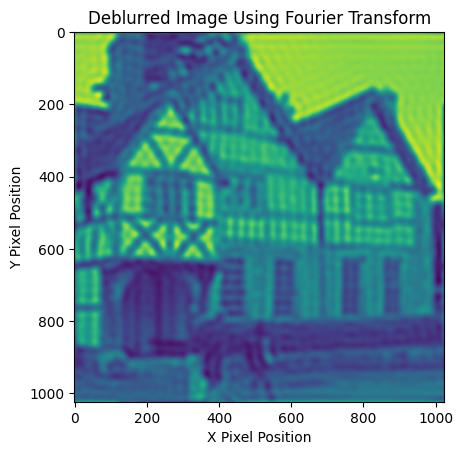

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, Slider


def gaussian(x, y,  w,  h,  sigma=25):
    return np.exp(-((x)**2 + (y)**2)/2/sigma**2)

def twod_fourier_transform(data):
    fdata = np.fft.fft2(data)
    return fdata

def set_minimum(data, min_val):
    data[np.abs(data) < min_val] = min_val
    return data 

def filter(data, sigma):
    blur = np.zeros((w, h))
    for x in range(-w//2, w//2):
        for y in range(-h//2, h//2):
            blur[(x + w) % w,  (y + h) %  h] = gaussian(x, y, w, h, sigma)
    with open("blur.txt", "r") as f:
        data = np.loadtxt(f, delimiter=" ", unpack=True).T
        img_fourier = twod_fourier_transform(data)

        blur_fourier = twod_fourier_transform(blur)

        deblurred_fourier = img_fourier / blur_fourier

        deblurred = np.fft.ifft2(deblurred_fourier).real

    return deblurred

with open("blur.txt", "r") as f:
    data = np.loadtxt(f, delimiter=" ", unpack=True).T
    w, h = data.shape
    plt.imshow(data)
    plt.title("Original Blurred Image")
    plt.xlabel("X Pixel Position")
    plt.ylabel("Y Pixel Position")
    plt.show()
    print(w,  h)
    blur = np.zeros((w, h))
    for x in range(-w//2, w//2):
        for y in range(-h//2, h//2):
            blur[(x + w) % w,  (y + h) %  h] = gaussian(x, y, w, h)
    plt.imshow(blur)
    plt.title("Point Spread Function (Gaussian Blur), Sigma=25")
    plt.xlabel("X Pixel Position")
    plt.ylabel("Y Pixel Position")
    plt.show()


    img_fourier = twod_fourier_transform(data)

    blur_fourier = twod_fourier_transform(blur)

    print(blur_fourier)

    deblurred_fourier = img_fourier / set_minimum(blur_fourier, 1e-3)

    deblurred = np.fft.ifft2(deblurred_fourier).real

    plt.imshow(deblurred)
    plt.title("Deblurred Image Using Fourier Transform")
    plt.xlabel("X Pixel Position")
    plt.ylabel("Y Pixel Position")
    plt.show()
